## **Importing Libraries**
These libraries contain functions that we will be using to create and display our maze.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

## **Creating the Maze Environment**

a maze with walls, a starting point (S), and a goal point (G).
The maze is set up on a grid where each cell is either a 0 or 1, with 0 representing a black empty space and 1 representing a white wall.




In [ ]:
class Maze:
    def __init__(self, maze, start_position, goal_position):
        # Initialize Maze
        self.maze = maze
        self.maze_height = maze_layout.shape[0]
        self.maze_width = maze_layout.shape[1]
        self.start_position = start_position
        self.goal_position = goal_position

    def show_maze(self):
        # Visualize the maze using Matplotlib
        plt.figure(figsize=(5,5))

        # Display the maze as an image in grayscale
        plt.imshow(self.maze, cmap='gray')

        # start and goal positions as 'S' and 'G'
        plt.text(self.start_position[0], self.start_position[1], 'S', ha='center', va='center', color='red', fontsize=20)
        plt.text(self.goal_position[0], self.goal_position[1], 'G', ha='center', va='center', color='green', fontsize=20)

        # Remove ticks and labels from the axes
        plt.xticks([]), plt.yticks([])

        # Show the plot
        plt.show()


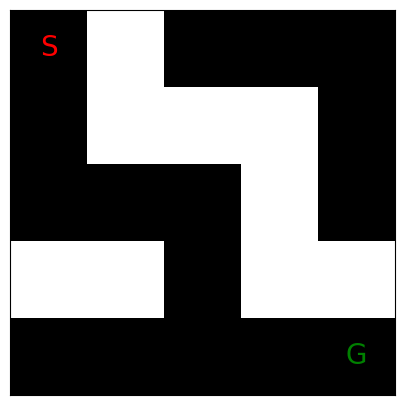

In [ ]:
# Create my maze
maze_layout = np.array([
    [0, 1, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 1, 0],
    [1, 1, 0, 1, 1],
    [0, 0, 0, 0, 0]
])

# Create an instance of the maze and set the starting and ending positions
maze = Maze(maze_layout, (0, 0), (4, 4))
# Visualize the maze
maze.show_maze()

## **Implementing the Agent**

 The agent can move in four directions: **up**, **down**, **left**, and **right**. As a variation to the project, we can (with a little bit of python knowledge) try making changes to the **learning** and **exploration** **rate** work as a variation to the project.(**Exploration vs Exploitation**)

In [ ]:
actions = [(-1, 0),
          (1, 0),
          (0, -1),
          (0, 1)]


class QLearningAgent:
    def __init__(self, maze, learning_rate=0.1, discount_factor=0.9, exploration_start=1.0, exploration_end=0.01, num_episodes=100):
        # Initialize the Q-learning agent with a Q-table containing all zeros
        self.q_table = np.zeros((maze.maze_height, maze.maze_width, 4))
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.exploration_start = exploration_start
        self.exploration_end = exploration_end
        self.num_episodes = num_episodes

    def get_exploration_rate(self, current_episode):
        # Calculate the current exploration rate
        exploration_rate = self.exploration_start * (self.exploration_end / self.exploration_start) ** (current_episode / self.num_episodes)
        return exploration_rate

    def get_action(self, state, current_episode):
        exploration_rate = self.get_exploration_rate(current_episode)

        # Select an action for the given state either randomly (exploration) or using the Q-table (exploitation)
        if np.random.rand() < exploration_rate:
            return np.random.randint(4)
        else:
            # the highest Q-value
            return np.argmax(self.q_table[state])

    def update_q_table(self, state, action, next_state, reward):

        best_next_action = np.argmax(self.q_table[next_state])

        current_q_value = self.q_table[state][action]

        new_q_value = current_q_value + self.learning_rate * (reward + self.discount_factor * self.q_table[next_state][best_next_action] - current_q_value)

        # Update the Q-table with the new Q-value
        self.q_table[state][action] = new_q_value

## **Defining the Reward System**

This is for determines the values for the reward system. The reward system provides feedback to the agent in reinforcement learning.

Use these default settings to see how the agent performs when untrained, and when initially trained.  Then adjust the values and repeat the training and evalution steps outlines in the project idea.  

Keep adjusting systematically until we have engineered the best possible reward system to have the AI learn to efficiently navigate a maze.

In [ ]:
goal_reward = 100
wall_penalty = -10
step_penalty = -1

## **Testing the Agent**

this is for tests how well the agent navigates the maze. It reports the total number of steps the agent took to get through the maze as well as the total reward the agent accumulated.

Every time you want to test the agent, run the function ten times.  Each time note the number of steps the agent used to travel between the **start** and the **goal**, as well as the total reward. Calculate the average steps and average reward across all ten test trials.
  For the agent  learning very well.
1. Test the agent before training.
2. Try solving the maze yourself by hand.
2. Test the agent after training with the default reward system values.
3. Make changes to the default reward system and test the agent.

In [ ]:
# This function simulates the agent's movements in the maze for a single episode.
def finish_episode(agent, maze, current_episode, train=True):
    # Initialize the agent's current state to the maze's start position
    current_state = maze.start_position
    is_done = False
    episode_reward = 0
    episode_step = 0
    path = [current_state]

    # Continue until the episode is done
    while not is_done:
        # Get the agent's action for the current state using its Q-table
        action = agent.get_action(current_state, current_episode)

        # Compute the next state based on the chosen action
        next_state = (current_state[0] + actions[action][0], current_state[1] + actions[action][1])

        # Check if the next state is out of bounds or hitting a wall
        if next_state[0] < 0 or next_state[0] >= maze.maze_height or next_state[1] < 0 or next_state[1] >= maze.maze_width or maze.maze[next_state[1]][next_state[0]] == 1:
            reward = wall_penalty
            next_state = current_state
        # Check if the agent reached the goal:
        elif next_state == (maze.goal_position):
            path.append(current_state)
            reward = goal_reward
            is_done = True
        # The agent takes a step but hasn't reached the goal yet
        else:
            path.append(current_state)
            reward = step_penalty

        # Update the cumulative reward and step count for the episode
        episode_reward += reward
        episode_step += 1

        if train == True:
            agent.update_q_table(current_state, action, next_state, reward)

        current_state = next_state

    # total number of steps, and the agent's path during the simulation
    return episode_reward, episode_step, path

Learned Path:
(0, 0)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 2)-> (1, 2)-> (0, 2)-> (0, 1)-> (0, 2)-> (1, 2)-> (2, 2)-> (1, 2)-> (2, 2)-> (2, 3)-> (2, 4)-> (1, 4)-> (0, 4)-> (1, 4)-> (2, 4)-> (1, 4)-> (0, 4)-> (1, 4)-> (2, 4)-> (1, 4)-> (2, 4)-> (3, 4)-> (2, 4)-> (1, 4)-> (0, 4)-> (1, 4)-> (0, 4)-> (1, 4)-> (0, 4)-> (1, 4)-> (0, 4)-> (1, 4)-> (2, 4)-> (2, 3)-> (2, 2)-> (2, 3)-> (2, 2)-> (2, 3)-> (2, 4)-> (2, 3)-> (2, 2)-> (1, 2)-> (2, 2)-> (1, 2)-> (0, 2)-> (1, 2)-> (2, 2)-> (2, 3)-> (2, 4)-> (3, 4)-> (2, 4)-> (1, 4)-> (0, 4)-> (1, 4)-> (2, 4)-> (1, 4)-> (0, 4)-> (1, 4)-> (2, 4)-> (3, 4)-> (2, 4)-> (2, 3)-> (2, 2)-> (2, 3)-> (2, 2)-> (1, 2)-> (0, 2)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 2)-> (1, 2)-> (0, 2)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 2)-> (0, 1)-> (0, 2)-> (1, 2)-> (0, 2)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 2)-> (0, 1)-> (0, 2)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 2)-> (1, 2)-> (0, 2)-> (0, 1)-> (0, 2)-> (0, 1)-> (0, 2)-> (1, 2)-> (2, 2

<Figure size 640x480 with 0 Axes>

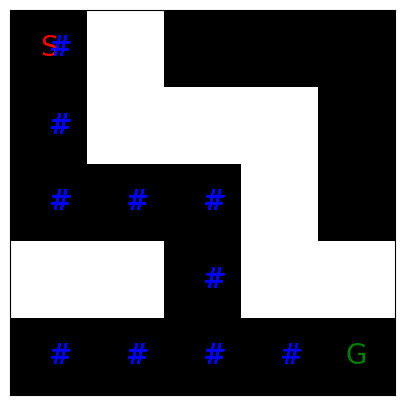

(243, -1285)

In [ ]:
def test_agent(agent, maze, num_episodes=1):
    # Simulate the agent's behavior in the maze for the specified number of episodes
    episode_reward, episode_step, path = finish_episode(agent, maze, num_episodes, train=False)

    # Print the learned path of the agent
    print("Learned Path:")
    for row, col in path:
        print(f"({row}, {col})-> ", end='')
    print("Goal!")

    print("Number of steps:", episode_step)
    print("Total reward:", episode_reward)

    # Clear the existing plot if any
    if plt.gcf().get_axes():
        plt.cla()

    # Visualize the maze using matplotlib
    plt.figure(figsize=(5,5))
    plt.imshow(maze.maze, cmap='gray')

    plt.text(maze.start_position[0], maze.start_position[1], 'S', ha='center', va='center', color='red', fontsize=20)
    plt.text(maze.goal_position[0], maze.goal_position[1], 'G', ha='center', va='center', color='green', fontsize=20)

    for position in path:
        plt.text(position[0], position[1], "#", va='center', color='blue', fontsize=20)

    # Remove axis ticks and grid lines for a cleaner visualization
    plt.xticks([]), plt.yticks([])
    plt.grid(color='black', linewidth=2)
    plt.show()

    return episode_step, episode_reward

agent = QLearningAgent(maze)
# Test the agent using the test_agent function
test_agent(agent, maze)

 the untrained agent takes *a lot* of steps because the agent keeps backtracking and hitting walls.
 Before it has learned anything, it is blindly going through the maze, choosing its path randomly.

## **Setting Up the Reinforcement Learning Loop**

this is for Q-learning, a basic reinforcement learning algorithm.used to train the agent. This code updates the Q-values based on the rewards it receives during **exploration**.

In [ ]:
def train_agent(agent, maze, num_episodes=100):
    # Lists to store the data for plotting
    episode_rewards = []
    episode_steps = []

    # Loop over the specified number of episodes
    for episode in range(num_episodes):
        episode_reward, episode_step, path = finish_episode(agent, maze, episode, train=True)

        # Store the episode's cumulative reward and the number of steps taken in their respective lists
        episode_rewards.append(episode_reward)
        episode_steps.append(episode_step)

    # Plotting the data after training is completed
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(episode_rewards)
    plt.xlabel('Episode')
    plt.ylabel('Cumulative Reward')
    plt.title('Reward per Episode')

    average_reward = sum(episode_rewards) / len(episode_rewards)
    print(f"The average reward is: {average_reward}")

    plt.subplot(1, 2, 2)
    plt.plot(episode_steps)
    plt.xlabel('Episode')
    plt.ylabel('Steps Taken')
    plt.ylim(0, 100)
    plt.title('Steps per Episode')

    average_steps = sum(episode_steps) / len(episode_steps)
    print(f"The average steps is: {average_steps}")

    plt.tight_layout()
    plt.show()

## **Training the Agent**

The average reward is: 46.92
The average steps is: 16.1


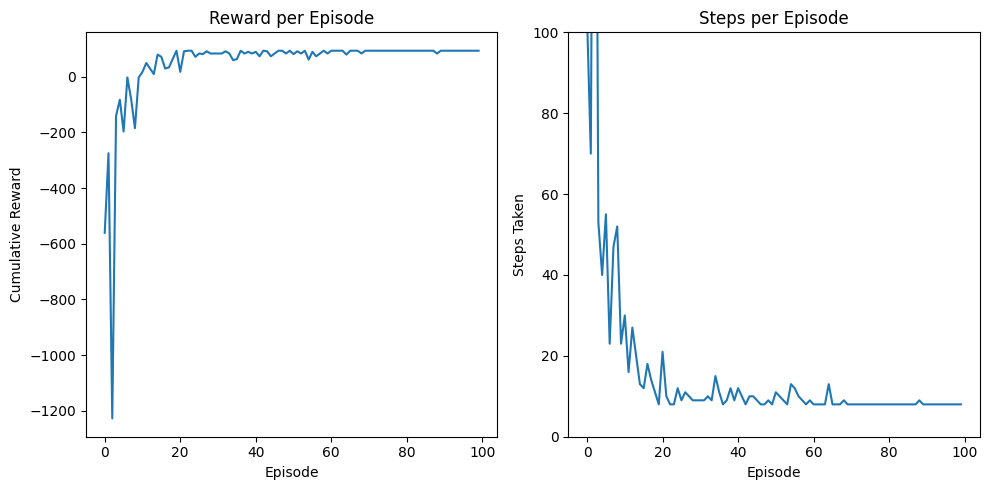

In [ ]:
# Training the agent
train_agent(agent, maze, num_episodes=100)

Learned Path:
(0, 0)-> (0, 0)-> (0, 1)-> (0, 2)-> (1, 2)-> (2, 2)-> (2, 3)-> (2, 4)-> (3, 4)-> Goal!
Number of steps: 8
Total reward: 93


<Figure size 640x480 with 0 Axes>

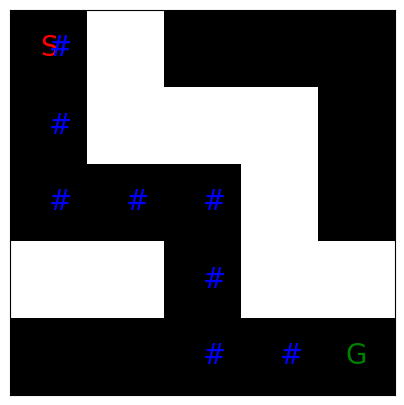

(8, 93)

In [ ]:
# Testing the agent after training
test_agent(agent, maze, num_episodes=100)

## **Evaluating the Agent**

1. Test the agent again using the test_agent function. Run the code 10 times and note how many steps the agent takes to reach the goal.
2. Check if the agent consistently find the shortest path from the starting position to the goal

## **Experimenting and Improving**

Try experimenting with a different reward system to see how that affects how the agent learns. (changing the goal reward from 0 to 1, 10, 20, 30, etc.. and to 100, and 1000.)

The average reward is: -75.22
The average steps is: 20.15


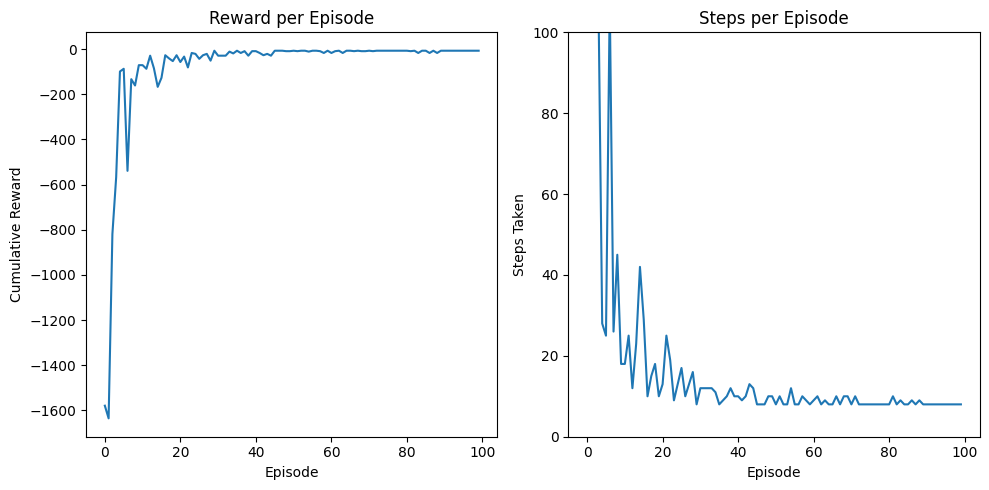

In [ ]:
goal_reward = 0
wall_penalty = -10
step_penalty = -1

agent = QLearningAgent(maze)

train_agent(agent, maze, num_episodes=100)

## **Variation: Creating More Mazes**

Create new mazes and test how well the agent performs in more complex mazes with multiple paths and dead ends

In [ ]:
# Create others mazes
maze_layout = np.array([[]])

# Create an instance of the maze
start_x = 2
start_y = 2
goal_x = 4
goal_y = 4
maze = Maze(maze_layout, (start_x, start_y), (goal_x, goal_y))
# Visualize the maze
maze.show_maze()

In [ ]:
# Create the agent object
agent = QLearningAgent(maze)
# Test the agent using the test_agent function
test_agent(agent, maze)

In [ ]:
# Training the agent
train_agent(agent, maze, num_episodes=100)

In [ ]:
# Testing agent again after training
test_agent(agent, maze)